### 환경데이터 - 선행연구와 보간법 비교 (+시각화)

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("2020/환경데이터_스무딩_완료.csv", encoding="ANSI")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71528 entries, 0 to 71527
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   realTime      71528 non-null  object 
 1   name          71528 non-null  int64  
 2   do            71528 non-null  object 
 3   city          71528 non-null  object 
 4   item          71528 non-null  object 
 5   cul_time      71528 non-null  int64  
 6   Measure_time  71212 non-null  object 
 7   temp_ex       70424 non-null  float64
 8   s_am          71528 non-null  float64
 9   as_am         71527 non-null  float64
 10  temp_int      70424 non-null  float64
 11  hum_int       70424 non-null  float64
 12  CO2           70424 non-null  float64
 13  st            70424 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 7.6+ MB


,realTime,name,do,city,item,cul_time,Measure_time,temp_ex,s_am,as_am,temp_int,hum_int,CO2,st
0,2020.9.15 0:00,11,충남,부여,딸기,1,2020.9.15 0:00,18.1,0.0,0.0,19.8,92.0,549.0,15.831841
1,2020.9.15 1:00,11,충남,부여,딸기,1,2020.9.15 1:00,18.2,0.0,0.0,19.6,93.0,520.0,15.831841
2,2020.9.15 2:00,11,충남,부여,딸기,1,2020.9.15 2:00,18.2,0.0,0.0,19.9,95.0,540.0,15.831841
3,2020.9.15 3:00,11,충남,부여,딸기,1,2020.9.15 3:00,18.4,0.0,0.0,20.0,96.0,531.0,15.831841
4,2020.9.15 4:00,11,충남,부여,딸기,1,2020.9.15 4:00,18.0,0.0,0.0,19.6,96.0,632.0,15.831841


### 주차 별로 합치는 코드 (기반)
1. 각 농가 별로 진행
2. 각 농가의 realTime 기준 7일 안까지 가져오기
3. 사용할 컬럼(온도_외부, 일사량_외부(?), 온도_내부, 상대습도_내부, 잔존CO2, 토양온도)를 일별 최대(max), 최소(min), 평균(mean)로 샘플링하고, 다시 한 번 주 별로 평균을 내어 샘플링한다.
4. 이때, 딕셔너리 활용
5. 최종 측정일이 모두 23시까지 있는 것이 아닌 것 유의하기

In [36]:
## 일별

import pandas as pd

# 데이터
df = pd.read_csv("2020/1.환경/2020_환경_딸기_2차_농가_선정.csv", encoding="ANSI")

# 선정한 변수
cols = ["realTime", "온도_외부", "온도_내부", "상대습도_내부", "잔존CO2", "토양온도"]


# 일별 데이터 저장할 딕셔너리
data = {"농가명":[], "date":[],
        "온도_외부_max":[], "온도_외부_min":[], "온도_외부_mean":[], 
        "온도_내부_max":[], "온도_내부_min":[], "온도_내부_mean":[],
        "상대습도_내부_max":[], "상대습도_내부_min":[], "상대습도_내부_mean":[],
        "잔존CO2_max":[], "잔존CO2_min":[], "잔존CO2_mean":[],
        "토양온도_max":[], "토양온도_min":[], "토양온도_mean":[]}

# 농가 id
farm_id = df["농가명"].unique()

# 농가 별
for f in farm_id :
    farm_df = df[df["농가명"]==f][cols]

    # 일 별로
    for i in range(0, farm_df.shape[0], 24) :
        sub_df = farm_df.iloc[i : i + 24]
        date = sub_df["realTime"].tolist()[0]

        # 데이터 추가
        data[f"농가명"].append(f)
        data[f"date"].append(date)
        # data[f"week_start_date"].append(sub_df.iloc[0]["realTime"])

        # 변수 별
        for c in cols[1:] : # realTime 제외
            data[f"{c}_max"].append(sub_df[c].max())
            data[f"{c}_min"].append(sub_df[c].min())
            data[f"{c}_mean"].append(sub_df[c].mean())


date_df = pd.DataFrame.from_dict(data=data, orient='columns')
date_df.to_csv("2020/1.환경/2020_환경_딸기_2차 농가_선정_일별.csv", encoding="ANSI", index=False)

In [41]:
df.columns

Index(['농가명', 'date', '온도_외부_max', '온도_외부_min', '온도_외부_mean', '온도_내부_max',
       '온도_내부_min', '온도_내부_mean', '상대습도_내부_max', '상대습도_내부_min', '상대습도_내부_mean',
       '잔존CO2_max', '잔존CO2_min', '잔존CO2_mean', '토양온도_max', '토양온도_min',
       '토양온도_mean'],
      dtype='object')

In [46]:
sub_df

,date,온도_외부_max,온도_외부_min,온도_외부_mean,온도_내부_max,온도_내부_min,온도_내부_mean,상대습도_내부_max,상대습도_내부_min,상대습도_내부_mean,잔존CO2_max,잔존CO2_min,잔존CO2_mean,토양온도_max,토양온도_min,토양온도_mean
217,2021-04-20 0:00,25.6,3.4,14.545833,25.5,6.1,16.041667,100.0,27.0,65.416667,1361.0,453.0,641.681818,18.1,11.7,15.108333
218,2021-04-21 0:00,29.9,7.6,18.204167,30.7,8.6,18.679167,100.0,19.0,58.583333,1111.0,451.0,587.608696,20.0,13.4,16.983333
219,2021-04-22 0:00,28.6,13.1,20.545833,30.9,13.9,20.341667,100.0,22.0,56.041667,672.0,445.0,540.739130,20.5,16.4,18.441667
220,2021-04-23 0:00,23.2,17.2,19.895833,26.0,15.5,19.450000,89.0,26.0,38.541667,642.0,427.0,470.375000,19.6,17.3,18.337500
221,2021-04-24 0:00,26.3,11.3,18.266667,28.6,12.5,18.700000,100.0,20.0,52.625000,583.0,430.0,490.166667,20.0,15.6,17.512500
222,2021-04-25 0:00,26.3,7.2,16.991667,27.6,13.7,20.000000,100.0,27.0,66.041667,637.0,442.0,508.454545,19.2,13.7,16.750000
223,2021-04-26 0:00,24.1,9.6,16.562500,23.7,10.6,16.800000,100.0,30.0,68.541667,780.0,444.0,539.086957,18.7,15.1,16.766667


In [50]:
import pandas as pd

# 데이터
df = pd.read_csv("2020/1.환경/2020_환경_딸기_2차 농가_선정_일별.csv", encoding="ANSI")

# 변수
cols = ["date", 
        '온도_외부_max', '온도_외부_min', '온도_외부_mean', 
        '온도_내부_max', '온도_내부_min', '온도_내부_mean', 
        '상대습도_내부_max', '상대습도_내부_min', '상대습도_내부_mean',
        '잔존CO2_max', '잔존CO2_min', '잔존CO2_mean', 
        '토양온도_max', '토양온도_min', '토양온도_mean']

# 주별 데이터 저장할 딕셔너리
data = {"농가명":[], "week":[], "week_start_date":[],
        "온도_외부_max":[], "온도_외부_min":[], "온도_외부_mean":[], 
        "온도_내부_max":[], "온도_내부_min":[], "온도_내부_mean":[],
        "상대습도_내부_max":[], "상대습도_내부_min":[], "상대습도_내부_mean":[],
        "잔존CO2_max":[], "잔존CO2_min":[], "잔존CO2_mean":[],
        "토양온도_max":[], "토양온도_min":[], "토양온도_mean":[]}


# 농가 id
farm_id = df["농가명"].unique()

# 농가 별
for f in farm_id :
    farm_df = df[df["농가명"]==f][cols]
    week = 1

    # 주차 별
    for i in range(0, farm_df.shape[0], 7) :
        # 확인용 출력
        print(i, week)
        print(farm_df.iloc[i])
        # print(farm_df.iloc[i + 24 * 6 + 23])

        sub_df = farm_df.iloc[i : i + 7]

        # 데이터 추가
        data[f"농가명"].append(f)
        data[f"week"].append(week)
        data[f"week_start_date"].append(sub_df.iloc[0]["date"])

        # 변수 별
        for c in cols[1:] : # realTime 제외
            data[c].append(sub_df[c].mean())
    
        week += 1

week_df = pd.DataFrame.from_dict(data=data, orient='columns')
week_df.to_csv("2020/1.환경/2020_환경_딸기_2차 농가 선정_주별_a.csv", encoding="ANSI", index=False)

0 1
date            2020-09-15 0:00
온도_외부_max                  29.2
온도_외부_min                  16.6
온도_외부_mean            22.754167
온도_내부_max                  29.4
온도_내부_min                  18.0
온도_내부_mean            23.170833
상대습도_내부_max                99.0
상대습도_내부_min                42.0
상대습도_내부_mean          75.791667
잔존CO2_max                 841.0
잔존CO2_min                 458.0
잔존CO2_mean           533.608696
토양온도_max                    NaN
토양온도_min                    NaN
토양온도_mean                   NaN
Name: 0, dtype: object
7 2
date            2020-09-22 0:00
온도_외부_max                  25.0
온도_외부_min                  12.4
온도_외부_mean            18.316667
온도_내부_max                  20.8
온도_내부_min                  19.2
온도_내부_mean            19.545455
상대습도_내부_max                85.0
상대습도_내부_min                26.0
상대습도_내부_mean              61.25
잔존CO2_max                 695.0
잔존CO2_min                 453.0
잔존CO2_mean               554.75
토양온도_max                    NaN
토양온도_min 

In [33]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   농가명           2983 non-null   int64  
 1   date          2983 non-null   object 
 2   온도_외부_max     2852 non-null   float64
 3   온도_외부_min     2852 non-null   float64
 4   온도_외부_mean    2852 non-null   float64
 5   온도_내부_max     2809 non-null   float64
 6   온도_내부_min     2809 non-null   float64
 7   온도_내부_mean    2809 non-null   float64
 8   상대습도_내부_max   2821 non-null   float64
 9   상대습도_내부_min   2821 non-null   float64
 10  상대습도_내부_mean  2821 non-null   float64
 11  잔존CO2_max     2823 non-null   float64
 12  잔존CO2_min     2823 non-null   float64
 13  잔존CO2_mean    2823 non-null   float64
 14  토양온도_max      2656 non-null   float64
 15  토양온도_min      2656 non-null   float64
 16  토양온도_mean     2656 non-null   float64
dtypes: float64(15), int64(1), object(1)
memory usage: 396.3+ KB


In [34]:
date_df

,농가명,date,온도_외부_max,온도_외부_min,온도_외부_mean,온도_내부_max,온도_내부_min,온도_내부_mean,상대습도_내부_max,상대습도_내부_min,상대습도_내부_mean,잔존CO2_max,잔존CO2_min,잔존CO2_mean,토양온도_max,토양온도_min,토양온도_mean
0,11,2020-09-15 0:00,29.2,16.6,22.754167,29.4,18.0,23.170833,99.0,42.0,75.791667,841.0,458.0,533.608696,NaN,NaN,NaN
1,11,2020-09-16 0:00,23.9,19.5,21.545833,25.7,20.6,22.762500,99.0,60.0,82.333333,738.0,470.0,540.565217,NaN,NaN,NaN
2,11,2020-09-17 0:00,24.4,19.6,21.766667,26.8,20.4,22.812500,100.0,67.0,88.166667,573.0,466.0,518.238095,NaN,NaN,NaN
3,11,2020-09-18 0:00,26.1,14.1,20.475000,26.4,15.9,21.020833,99.0,35.0,69.583333,561.0,551.0,556.000000,NaN,NaN,NaN
4,11,2020-09-19 0:00,26.0,12.5,18.462500,28.9,14.3,20.529167,92.0,31.0,63.916667,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,52,2021-05-22 0:00,28.4,12.4,20.812500,33.4,12.9,22.583333,93.6,43.0,69.562500,387.0,323.0,352.000000,27.6,16.4,21.658333
2979,52,2021-05-23 0:00,29.1,12.5,21.133333,35.2,12.9,23.129167,97.8,44.7,74.166667,446.0,356.0,389.500000,26.5,17.9,22.358333
2980,52,2021-05-24 0:00,27.6,17.8,21.554167,31.7,17.8,23.470833,96.3,44.2,72.375000,479.0,350.0,400.250000,25.8,20.9,23.137500
2981,52,2021-05-25 0:00,25.1,11.1,17.362500,31.0,11.7,19.391667,92.5,40.5,67.341667,367.0,334.0,350.250000,24.1,16.7,20.595833


### 최종

In [5]:
import pandas as pd

# 데이터
df = pd.read_csv("2020/환경데이터_스무딩_완료.csv", encoding="ANSI")

In [6]:
df

,realTime,name,do,city,item,cul_time,Measure_time,temp_ex,s_am,as_am,temp_int,hum_int,CO2,st
0,2020.9.15 0:00,11,충남,부여,딸기,1,2020.9.15 0:00,18.1,0.00,0.00,19.8,92.0,549.0,15.831841
1,2020.9.15 1:00,11,충남,부여,딸기,1,2020.9.15 1:00,18.2,0.00,0.00,19.6,93.0,520.0,15.831841
2,2020.9.15 2:00,11,충남,부여,딸기,1,2020.9.15 2:00,18.2,0.00,0.00,19.9,95.0,540.0,15.831841
3,2020.9.15 3:00,11,충남,부여,딸기,1,2020.9.15 3:00,18.4,0.00,0.00,20.0,96.0,531.0,15.831841
4,2020.9.15 4:00,11,충남,부여,딸기,1,2020.9.15 4:00,18.0,0.00,0.00,19.6,96.0,632.0,15.831841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71523,2021-05-26 7:00,52,경남,산청,딸기,1,2021-05-26 7:00,12.7,0.00,0.00,14.2,81.5,333.0,15.500000
71524,2021-05-26 8:00,52,경남,산청,딸기,1,2021-05-26 8:00,13.4,0.00,0.00,17.6,76.6,346.0,15.600000
71525,2021-05-26 9:00,52,경남,산청,딸기,1,2021-05-26 9:00,16.3,0.00,0.00,18.9,64.5,355.0,16.000000
71526,2021-05-26 10:00,52,경남,산청,딸기,1,2021-05-26 10:00,18.2,1.51,1.51,22.2,55.6,352.0,16.600000


In [7]:
# 일사량, 누적 일사량 나누기 100

df["s_am"] = df["s_am"]/100
df["as_am"] = df["as_am"]/100

#### a case

In [8]:
## 일별

# import pandas as pd

# 데이터
# df = pd.read_csv("2020/환경데이터_최종.csv", encoding="ANSI")

# 선정한 변수
cols = ["realTime", "temp_ex", "s_am", "temp_int", "hum_int", "CO2", "st"]


# 일별 데이터 저장할 딕셔너리
data = {"id":[], "date":[],
        "temp_ex_max":[], "temp_ex_min":[], "temp_ex_mean":[],
        's_am_max':[], 's_am_min':[], 's_am_mean':[],
        "temp_int_max":[], "temp_int_min":[], "temp_int_mean":[],
        "hum_int_max":[], "hum_int_min":[], "hum_int_mean":[],
        "CO2_max":[], "CO2_min":[], "CO2_mean":[],
        "st_max":[], "st_min":[], "st_mean":[]}

# 농가 id
farm_id = df["name"].unique()

# 농가 별
for f in farm_id :
    farm_df = df[df["name"]==f][cols]

    # 주 별로 24시간 * 7일
    for i in range(0, farm_df.shape[0], 24*7) :
        sub_df = farm_df.iloc[i : i + 24*7]
        date = sub_df["realTime"].tolist()[0]

        # 데이터 추가
        data[f"id"].append(f)
        data[f"date"].append(date)
        # data[f"week_start_date"].append(sub_df.iloc[0]["realTime"])

        # 변수 별
        for c in cols[1:] : # realTime 제외
            data[f"{c}_max"].append(sub_df[c].max())
            if c == "s_am" :
                print(f, date)
                data[f"{c}_min"].append(sorted(sub_df[c].unique())[1])
            else : 
                data[f"{c}_min"].append(sub_df[c].min())
            data[f"{c}_mean"].append(sub_df[c].mean())


date_df = pd.DataFrame.from_dict(data=data, orient='columns')
date_df.to_csv("2020/환경데이터_최최종_주별_선행연구.csv", encoding="ANSI", index=False)

11 2020.9.15 0:00
11 2020.9.22 0:00
11 2020.9.29 0:00
11 2020.10.6 0:00
11 2020.10.13 0:00
11 2020.10.20 0:00
11 2020.10.27 0:00
11 2020.11.3 0:00
11 2020.11.10 0:00
11 2020.11.17 0:00
11 2020.11.24 0:00
11 2020.12.1 0:00
11 2020.12.8 0:00
11 2020.12.15 0:00
11 2020.12.22 0:00
11 2020.12.29 0:00
11 2021.1.5 0:00
11 2021.1.12 0:00
11 2021.1.19 0:00
11 2021.1.26 0:00
11 2021.2.2 0:00
11 2021.2.9 0:00
11 2021.2.16 0:00
11 2021.2.23 0:00
11 2021.3.2 0:00
11 2021.3.9 0:00
11 2021.3.16 0:00
11 2021.3.23 0:00
11 2021.3.30 0:00
11 2021.4.6 0:00
11 2021.4.13 0:00
11 2021.4.20 0:00
16 2020.9.10 0:00
16 2020.9.17 0:00
16 2020.9.24 0:00
16 2020.10.1 0:00
16 2020.10.8 0:00
16 2020.10.15 0:00
16 2020.10.22 0:00
16 2020.10.29 0:00
16 2020.11.5 0:00
16 2020.11.12 0:00
16 2020.11.19 0:00
16 2020.11.26 0:00
16 2020.12.3 0:00
16 2020.12.10 0:00
16 2020.12.17 0:00
16 2020.12.24 0:00
16 2020.12.31 0:00
16 2021.1.7 0:00
16 2021.1.14 0:00
16 2021.1.21 0:00
16 2021.1.28 0:00
16 2021.2.4 0:00
16 2021.2.11 0:00

In [10]:
our_df = pd.read_csv("2020/환경데이터_최최종_주별_a.csv")
org_df = pd.read_csv("2020/환경데이터_최최종_주별_선행연구.csv")

In [11]:
our_df.head(3)

,id,week,week_start_date,temp_ex_max,temp_ex_min,temp_ex_mean,s_am_max,s_am_min,s_am_mean,temp_int_max,...,temp_int_mean,hum_int_max,hum_int_min,hum_int_mean,CO2_max,CO2_min,CO2_mean,st_max,st_min,st_mean
0,11,1,2020.9.15 0:00,26.014286,14.800000,20.001786,2.305714,0.020000,0.629167,27.571429,...,21.647024,94.285714,41.285714,71.607143,619.209302,478.498339,517.035714,15.831841,15.831841,15.831841
1,11,2,2020.9.22 0:00,25.771429,13.785714,19.422619,2.765714,0.015714,0.744940,26.941109,...,22.778345,86.285714,16.714286,56.937500,888.714286,434.285714,514.053571,15.831841,15.831841,15.831841
2,11,3,2020.9.29 0:00,24.628571,12.900000,18.129762,2.494286,0.030000,0.560060,24.073441,...,23.863626,90.571429,18.428571,62.595238,882.428571,435.000000,558.377976,15.831841,15.831841,15.831841


In [12]:
org_df.head(3)

,id,date,temp_ex_max,temp_ex_min,temp_ex_mean,s_am_max,s_am_min,s_am_mean,temp_int_max,temp_int_min,temp_int_mean,hum_int_max,hum_int_min,hum_int_mean,CO2_max,CO2_min,CO2_mean,st_max,st_min,st_mean
0,11,2020.9.15 0:00,29.2,9.9,20.001786,3.11,0.01,0.629167,29.700000,14.100000,21.647024,100.0,26.0,71.607143,841.0,449.0,517.035714,15.831841,15.831841,15.831841
1,11,2020.9.22 0:00,27.8,12.4,19.422619,2.87,0.01,0.744940,39.500000,16.400000,22.778345,92.0,8.0,56.937500,1342.0,428.0,514.053571,15.831841,15.831841,15.831841
2,11,2020.9.29 0:00,28.2,5.9,18.129762,2.77,0.01,0.560060,25.387067,22.340185,23.863626,99.0,3.0,62.595238,1234.0,424.0,558.377976,15.831841,15.831841,15.831841


In [17]:
our_df.columns[3:]

Index(['temp_ex_max', 'temp_ex_min', 'temp_ex_mean', 's_am_max', 's_am_min',
       's_am_mean', 'temp_int_max', 'temp_int_min', 'temp_int_mean',
       'hum_int_max', 'hum_int_min', 'hum_int_mean', 'CO2_max', 'CO2_min',
       'CO2_mean', 'st_max', 'st_min', 'st_mean'],
      dtype='object')

In [18]:
cols = org_df.columns[2:]

In [19]:
ids = org_df["id"].unique()

In [39]:
our_df["week_start_date"] = pd.to_datetime(our_df["week_start_date"])

In [20]:
org_df["date"] = pd.to_datetime(org_df["date"])

In [24]:
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [27]:
cols

Index(['temp_ex_max', 'temp_ex_min', 'temp_ex_mean', 's_am_max', 's_am_min',
       's_am_mean', 'temp_int_max', 'temp_int_min', 'temp_int_mean',
       'hum_int_max', 'hum_int_min', 'hum_int_mean', 'CO2_max', 'CO2_min',
       'CO2_mean', 'st_max', 'st_min', 'st_mean'],
      dtype='object')

In [34]:
"temp_ex_miin"[:-4]

'temp_ex_'

c:\Users\mool8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\mool8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


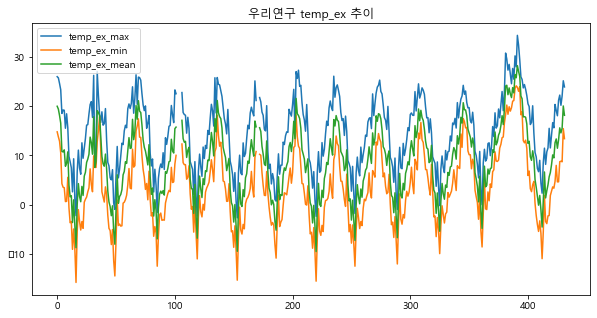

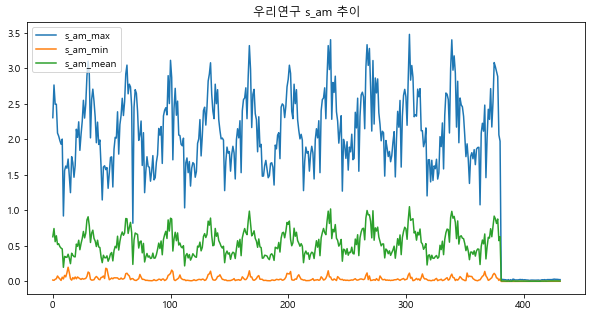

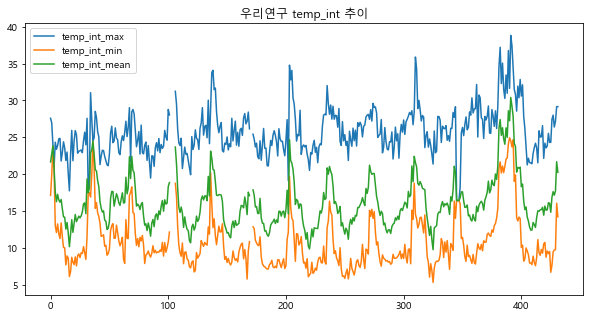

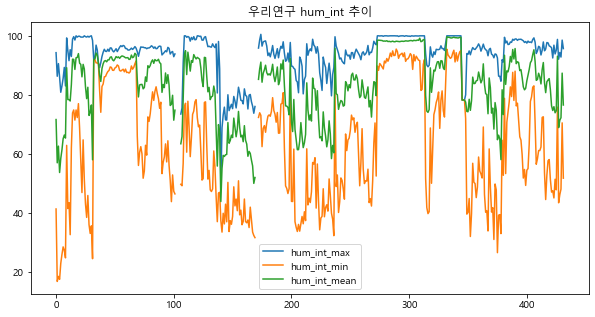

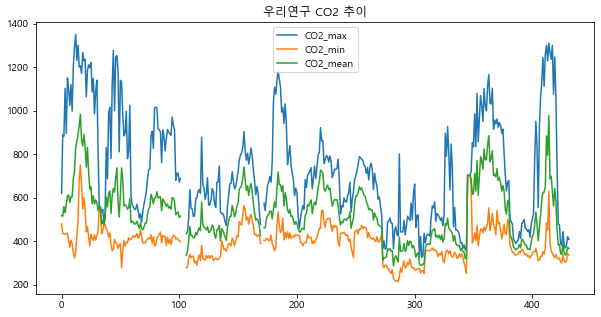

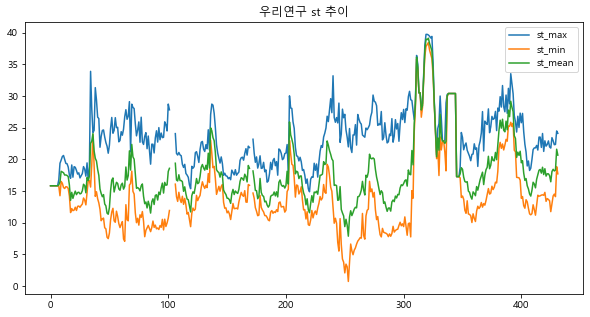

In [49]:
# for i in ids :
#     sub_df = our_df[our_df["id"]==i]
for c in range(0, len(cols), 3) :
    plt.figure(figsize=(10,5))
    for t in range(3):
        plt.plot(range(org_df.shape[0]), our_df[cols[c+t]], label=cols[c+t])
    title = f"우리연구 {cols[c][:-4]} 추이"
    plt.legend()
    plt.title(title)
    plt.savefig(f"2020/plot/비교/{title}_농가구분X.png")
    plt.show()
    plt.close()

c:\Users\mool8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\mool8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


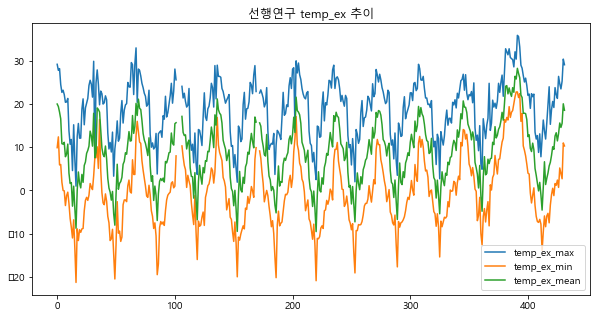

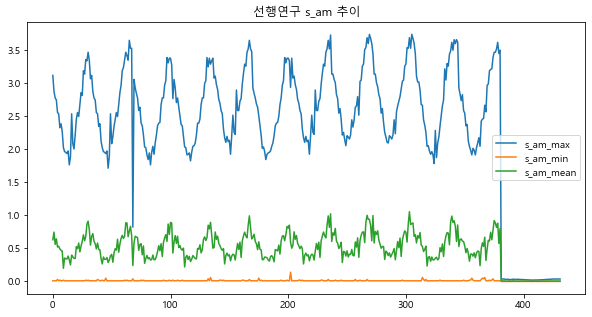

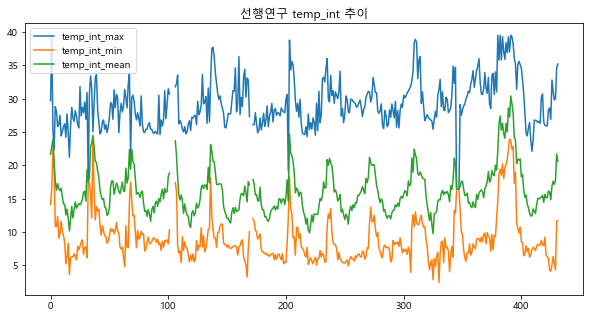

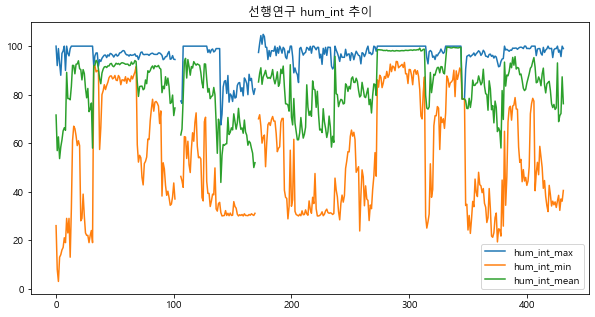

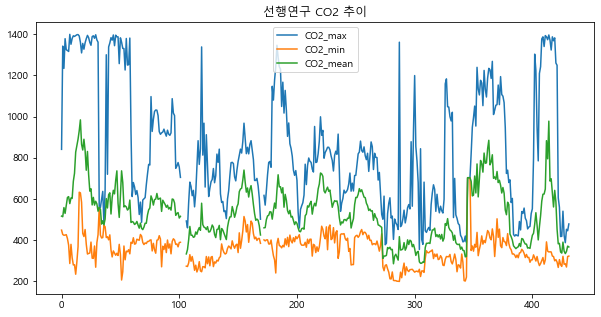

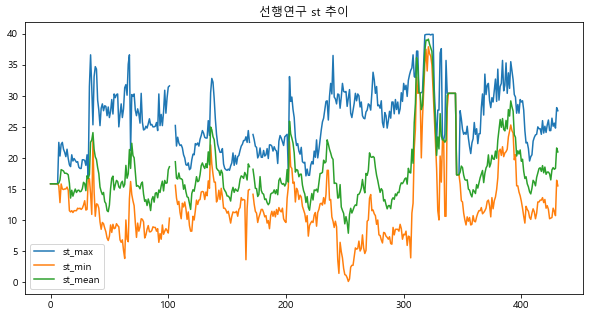

In [48]:
# 선행연구
# for i in ids :
#     sub_df = org_df[org_df["id"]==i]
for c in range(0, len(cols), 3) :
    plt.figure(figsize=(10,5))
    for t in range(3):
        plt.plot(range(org_df.shape[0]), org_df[cols[c+t]], label=cols[c+t])
    title = f"선행연구 {cols[c][:-4]} 추이"
    plt.legend()
    plt.title(title)
    plt.savefig(f"2020/plot/비교/{title}_농가구분X.png")
    plt.show()
    plt.close()

In [40]:
## 주별

import pandas as pd

# 데이터
df = pd.read_csv("2020/환경데이터_최최종_일별_a.csv", encoding="ANSI")

# 변수
cols = ["date", 
        'temp_ex_max', 'temp_ex_min', 'temp_ex_mean', 
        's_am_max', 's_am_min', 's_am_mean', 
        'temp_int_max', 'temp_int_min', 'temp_int_mean', 
        'hum_int_max', 'hum_int_min', 'hum_int_mean',
        'CO2_max', 'CO2_min', 'CO2_mean', 
        'st_max', 'st_min', 'st_mean']

# 주별 데이터 저장할 딕셔너리
data = {"id":[], "week":[], "week_start_date":[],
        "temp_ex_max":[], "temp_ex_min":[], "temp_ex_mean":[],
        's_am_max':[], 's_am_min':[], 's_am_mean':[], 
        "temp_int_max":[], "temp_int_min":[], "temp_int_mean":[],
        "hum_int_max":[], "hum_int_min":[], "hum_int_mean":[],
        "CO2_max":[], "CO2_min":[], "CO2_mean":[],
        "st_max":[], "st_min":[], "st_mean":[]}


# 농가 id
farm_id = df["id"].unique()

# 농가 별
for f in farm_id :
    farm_df = df[df["id"]==f][cols]
    week = 1

    # 주차 별
    for i in range(0, farm_df.shape[0], 7) :
        # 확인용 출력
        print(i, week)
        print(farm_df.iloc[i])
        # print(farm_df.iloc[i + 24 * 6 + 23])

        sub_df = farm_df.iloc[i : i + 7]

        # 데이터 추가
        data[f"id"].append(f)
        data[f"week"].append(week)
        data[f"week_start_date"].append(sub_df.iloc[0]["date"])

        # 변수 별
        for c in cols[1:] : # realTime 제외
            data[c].append(sub_df[c].mean())
    
        week += 1

week_df = pd.DataFrame.from_dict(data=data, orient='columns')
week_df.to_csv("2020/환경데이터_최최종_주별_a.csv", encoding="ANSI", index=False)

0 1
date             2020.9.15 0:00
temp_ex_max                29.2
temp_ex_min                16.6
temp_ex_mean          22.754167
s_am_max                   2.53
s_am_min                   0.03
s_am_mean                 0.725
temp_int_max               29.4
temp_int_min               18.0
temp_int_mean         23.170833
hum_int_max                99.0
hum_int_min                42.0
hum_int_mean          75.791667
CO2_max                   841.0
CO2_min                   458.0
CO2_mean               534.3125
st_max                15.831841
st_min                15.831841
st_mean               15.831841
Name: 0, dtype: object
7 2
date             2020.9.22 0:00
temp_ex_max                25.0
temp_ex_min                12.4
temp_ex_mean          18.316667
s_am_max                   2.85
s_am_min                   0.02
s_am_mean              0.754167
temp_int_max               20.8
temp_int_min               19.2
temp_int_mean          19.79678
hum_int_max                85.0
hum_int_m

#### b case

In [45]:
df = pd.read_csv("2020/환경데이터_스무딩_완료.csv", encoding="ANSI")

df["s_am"] = df["s_am"]/100
df["as_am"] = df["as_am"]/100

In [46]:
df

,realTime,name,do,city,item,cul_time,Measure_time,temp_ex,s_am,as_am,temp_int,hum_int,CO2,st
0,2020.9.15 0:00,11,충남,부여,딸기,1,2020.9.15 0:00,18.1,0.0000,0.0000,19.8,92.0,549.0,15.831841
1,2020.9.15 1:00,11,충남,부여,딸기,1,2020.9.15 1:00,18.2,0.0000,0.0000,19.6,93.0,520.0,15.831841
2,2020.9.15 2:00,11,충남,부여,딸기,1,2020.9.15 2:00,18.2,0.0000,0.0000,19.9,95.0,540.0,15.831841
3,2020.9.15 3:00,11,충남,부여,딸기,1,2020.9.15 3:00,18.4,0.0000,0.0000,20.0,96.0,531.0,15.831841
4,2020.9.15 4:00,11,충남,부여,딸기,1,2020.9.15 4:00,18.0,0.0000,0.0000,19.6,96.0,632.0,15.831841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71523,2021-05-26 7:00,52,경남,산청,딸기,1,2021-05-26 7:00,12.7,0.0000,0.0000,14.2,81.5,333.0,15.500000
71524,2021-05-26 8:00,52,경남,산청,딸기,1,2021-05-26 8:00,13.4,0.0000,0.0000,17.6,76.6,346.0,15.600000
71525,2021-05-26 9:00,52,경남,산청,딸기,1,2021-05-26 9:00,16.3,0.0000,0.0000,18.9,64.5,355.0,16.000000
71526,2021-05-26 10:00,52,경남,산청,딸기,1,2021-05-26 10:00,18.2,0.0151,0.0151,22.2,55.6,352.0,16.600000


In [47]:
## 일별

import pandas as pd

# 데이터
# df = pd.read_csv("2020/환경데이터_스무딩_완료.csv", encoding="ANSI")

# 선정한 변수
cols = ["realTime", "temp_ex", "s_am", "temp_int", "hum_int", "CO2", "st"]


# 일별 데이터 저장할 딕셔너리
data = {"id":[], "date":[],
        "temp_ex_day":[], "temp_ex_night":[],
        's_am_day':[], 's_am_night':[],
        "temp_int_day":[], "temp_int_night":[], 
        "hum_int_day":[], "hum_int_night":[],
        "CO2_day":[], "CO2_night":[], 
        "st_day":[], "st_night":[]}

# 농가 id
farm_id = df["name"].unique()

# 농가 별
for f in farm_id :
    farm_df = df[df["name"]==f][cols]

    # 일 별로
    for i in range(0, farm_df.shape[0], 24) :
        sub_df = farm_df.iloc[i : i + 24]
        date = sub_df["realTime"].tolist()[0]

        # 데이터 추가
        data[f"id"].append(f)
        data[f"date"].append(date)
        # data[f"week_start_date"].append(sub_df.iloc[0]["realTime"])
        
        day_df = sub_df[sub_df["s_am"] != 0]
        night_df = sub_df[sub_df["s_am"] == 0]

        # 변수 별
        for c in cols[1:] : # realTime 제외
            data[f"{c}_day"].append(day_df[c].mean())
            data[f"{c}_night"].append(night_df[c].mean())

date_df = pd.DataFrame.from_dict(data=data, orient='columns')
date_df.to_csv("2020/환경데이터_최최종_일별_b.csv", encoding="ANSI", index=False)

In [49]:
## 주별

import pandas as pd

# 데이터
df = pd.read_csv("2020/환경데이터_최최종_일별_b.csv", encoding="ANSI")

# 변수
cols = ["date", 
        'temp_ex_day', 'temp_ex_night',
        's_am_day', 's_am_night',
        'temp_int_day', 'temp_int_night',
        'hum_int_day', 'hum_int_night',
        'CO2_day', 'CO2_night',
        'st_day', 'st_night']

# 주별 데이터 저장할 딕셔너리
data = {"id":[], "week":[], "week_start_date":[],
        "temp_ex_day":[], "temp_ex_night":[],
        's_am_day':[], 's_am_night':[],
        "temp_int_day":[], "temp_int_night":[], 
        "hum_int_day":[], "hum_int_night":[],
        "CO2_day":[], "CO2_night":[], 
        "st_day":[], "st_night":[] }


# 농가 id
farm_id = df["id"].unique()

# 농가 별
for f in farm_id :
    farm_df = df[df["id"]==f][cols]
    week = 1

    # 주차 별
    for i in range(0, farm_df.shape[0], 7) :
        # 확인용 출력
        print(i, week)
        print(farm_df.iloc[i])
        # print(farm_df.iloc[i + 24 * 6 + 23])

        sub_df = farm_df.iloc[i : i + 7]

        # 데이터 추가
        data[f"id"].append(f)
        data[f"week"].append(week)
        data[f"week_start_date"].append(sub_df.iloc[0]["date"])

        # 변수 별
        for c in cols[1:] : # realTime 제외
            data[c].append(sub_df[c].mean())
    
        week += 1

week_df = pd.DataFrame.from_dict(data=data, orient='columns')
week_df.to_csv("2020/환경데이터_최최종_주별_b.csv", encoding="ANSI", index=False)

0 1
date              2020.9.15 0:00
temp_ex_day            25.761538
temp_ex_night               19.2
s_am_day                1.338462
s_am_night                   0.0
temp_int_day           25.569231
temp_int_night         20.336364
hum_int_day            64.538462
hum_int_night          89.090909
CO2_day               514.692308
CO2_night                  557.5
st_day                 15.831841
st_night               15.831841
Name: 0, dtype: object
7 2
date              2020.9.22 0:00
temp_ex_day            21.276923
temp_ex_night          14.818182
s_am_day                1.392308
s_am_night                   0.0
temp_int_day            20.08284
temp_int_night         19.458709
hum_int_day            47.307692
hum_int_night          77.727273
CO2_day               520.076923
CO2_night             595.727273
st_day                 15.831841
st_night               15.831841
Name: 7, dtype: object
14 3
date              2020.9.29 0:00
temp_ex_day            21.766667
temp_ex_night    